# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файлов

In [222]:
import pandas as pd
from IPython.display import display

users = pd.read_csv('./datasets/users.csv')
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице users 500 строк и 8 колонок. В каждой строчке таблицы информация о пользователи компании. Согласно документации:

- `user_id` — уникальный идентификатор пользователя;
- `first_name` — имя пользователя;
- `last_name` — фамилия пользователя;
- `age` — возраст пользователя (годы);
- `reg_date` — дата подключения тарифа (день, месяц, год);
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
- `city` — город проживания пользователя;
- `tarif` — название тарифного плана.

Пропуски в столбце `churn_date` соответствуют информации по документации, поэтому мы можем их проигнорировать. Хотя в стопцах `reg_date` и `churn_date` сохраняются даты, тип данных у них `object`, в будущем следует это исправить. Типы данных в других столбцах соответствуют своей природе.

In [223]:
calls = pd.read_csv('./datasets/calls.csv')
display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице `calls` (4 колонки и 202607 строк) сохраняется история звонков для каждого пользователя сети. Столбцы описывают следующие данные:

- `id` — уникальный номер звонка;
- `call_date` — дата звонка;
- `duration` — длительность звонка в минутах;
- `user_id` — идентификатор пользователя, сделавшего звонок.

Пропусков в столбцах нет. Тип данных в столбце `call_date` не отображает действительность, следует его заменить на `datetime64`. Из документации мы знаем, что каждый звонок округляется отдельно: даже если он продлился одну секунду, будет засчитана минута. Поэтому в будущем мы можем привести столбец `duration` к `int64` с округлением вверх.

In [224]:
messages = pd.read_csv('./datasets/messages.csv')
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице `messages` информация о сообщениях пользователей. В общей сложности у нас есть 123036 записей со столбцами:

- `id` — уникальный номер сообщения;
- `message_date` — дата сообщения;
- `user_id` — идентификатор пользователя, отправившего сообщение.

Тип `message_date` следует заменить на `datetime64`.

In [225]:
internet = pd.read_csv('./datasets/internet.csv')
display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице `internet` информация об интернет-сессиях. Согласно документации:

- `id` — уникальный номер сессии;
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
- `session_date` — дата интернет-сессии;
- `user_id` — идентификатор пользователя.

Также можно увидеть еще одну колонку `Unnamed: 0`, о которой нет упоминания в документации. Скорее всего, это колонка с индексами, причиной создания которой стало неправильное сохранение `csv` файла. Мы можем удалить эту колонку.
Тип данных в столбце `session_date` не соответствует действительности.

In [226]:
tariffs = pd.read_csv('./datasets/tariffs.csv')
display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице `tariffs` только две записи, соответствующие описанию двух тарифов. Столбцов в таблице 8:

- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Тип всех колонок соответствует действительности. А данные в столбцах соответствуют описанию тарифов:

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

#### Вывод
У нас есть 5 датафреймов с данными из 5 разных `csv-файлов`. У данных почти нет ошибок и несоответствий, но чтобы двигаться дальше, нам нужно их устранить.

**Датафрейм `users`:**
- изменить тип данных в колонке `reg_date`;
- изменить тип данных в колонке `churn_date`.

**Датафрейм `calls`:**
- изменить тип данных в колонке `call_date`;
- изменить тип данных в колонке `duration` на `int64` с округлением вверх.

**Датафрейм `messages`:**
- изменить тип данных в колонке `message_date`.

**Датафрейм `internet`:**
- изменить тип данных в колонке `session_date`;
- удалить столбец `Unnamed`.

**Датафрейм `tariffs`** останется без изменений.

## Предобработка данных


### Замена типа данных
Заменим тип данных для столбцов `reg_date`, `churn_date` в датафрейме `users`:

In [227]:
# так как формат записи даты во всех датафреймах одинаков, создадим отдельную переменную для него

date_format = '%Y-%m-%d'

for col in ['reg_date', 'churn_date']:
    users[col] = pd.to_datetime(
        users[col], format=date_format
    )

Заменим тип данных для столбца `call_date` в датафрейме `calls`. Также округлим данные в столбце `duration` и приведем к `int`:

In [228]:
import numpy as np

calls['call_date'] = pd.to_datetime(
    calls['call_date'], format=date_format
)
calls['duration'] = np.ceil(calls['duration']).astype('int')

Заменим тип данных для столбца `message_date` в датафрейме `messages`:

In [229]:
messages['message_date'] = pd.to_datetime(
    messages['message_date'], format=date_format
)

Заменим тип данных для столбца `session_date` в датафрейме `internet` и удалим лишний столбец.

In [230]:
internet['session_date'] = pd.to_datetime(
    internet['session_date'], format=date_format
)
internet = internet.drop(columns='Unnamed: 0')

Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


In [231]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls_per_month = calls.pivot_table(
    index=['user_id', 'month'],
    values='duration',
    aggfunc=['sum', 'count']
).reset_index()
calls_per_month.columns = ['user_id', 'month', 'duration_total','calls_total']
calls_per_month.head()

,user_id,month,duration_total,calls_total
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


In [232]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages_per_month = messages.pivot_table(
    index=['user_id', 'month'],
    values='id',
    aggfunc='count'
).reset_index()
messages_per_month.columns = ['user_id', 'month', 'messages_total']
messages_per_month.head()

,user_id,month,messages_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [233]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_per_month = internet.pivot_table(
    index=['user_id', 'month'],
    values='mb_used',
    aggfunc='sum'
).reset_index()
internet_per_month.columns = ['user_id', 'month', 'mb_used_total']
internet_per_month.head()

,user_id,month,mb_used_total
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [234]:
from functools import reduce

data_frames = [calls_per_month, messages_per_month, internet_per_month]
data = reduce(lambda left,right: pd.merge(left, right, on=['user_id', 'month']), data_frames)
data.head()

,user_id,month,duration_total,calls_total,messages_total,mb_used_total
0,1000,5,159,22,22,2253.49
1,1000,6,172,43,60,23233.77
2,1000,7,340,47,75,14003.64
3,1000,8,408,52,81,14055.93
4,1000,9,466,58,57,14568.91


In [235]:
data = data.merge(users, on='user_id', how='left')
data.head()

,user_id,month,duration_total,calls_total,messages_total,mb_used_total,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159,22,22,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172,43,60,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340,47,75,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408,52,81,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466,58,57,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [236]:
data = data.merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')
data.head()

,user_id,month,duration_total,calls_total,messages_total,mb_used_total,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159,22,22,2253.49,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172,43,60,23233.77,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340,47,75,14003.64,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408,52,81,14055.93,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466,58,57,14568.91,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [314]:
def get_monthly_revenue(row):
    minutes_over_tariff = max(row['duration_total'] - row['minutes_included'], 0)
    messages_over_tariff = max(row['messages_total'] - row['messages_included'], 0)
    mb_over_tariff = max(row['mb_used_total'] - row['mb_per_month_included'], 0)

    return (
            minutes_over_tariff * row['rub_per_minute'] +
            messages_over_tariff * row['rub_per_message'] +
            np.ceil(mb_over_tariff / 1024) * row['rub_per_gb'] +
            row['rub_monthly_fee']
    )

data['revenue'] = data.apply(get_monthly_revenue, axis=1)

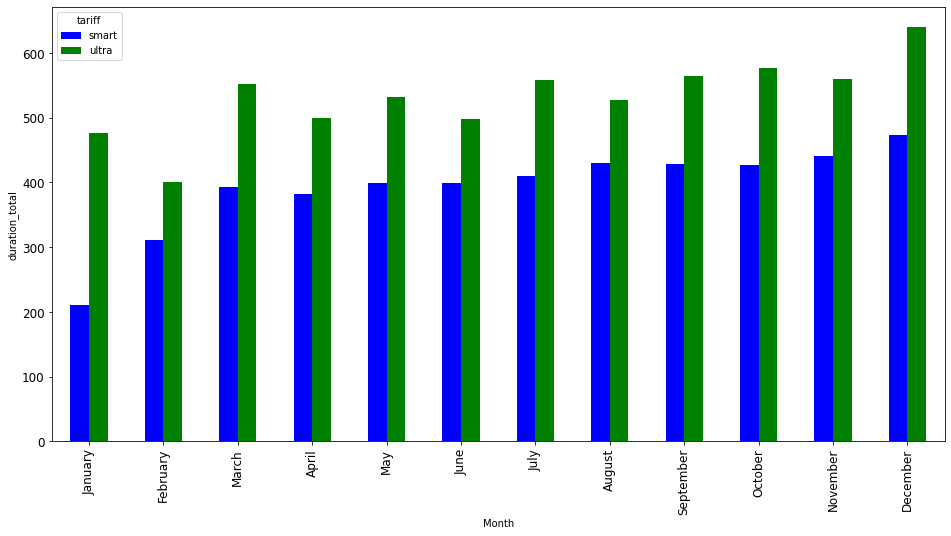

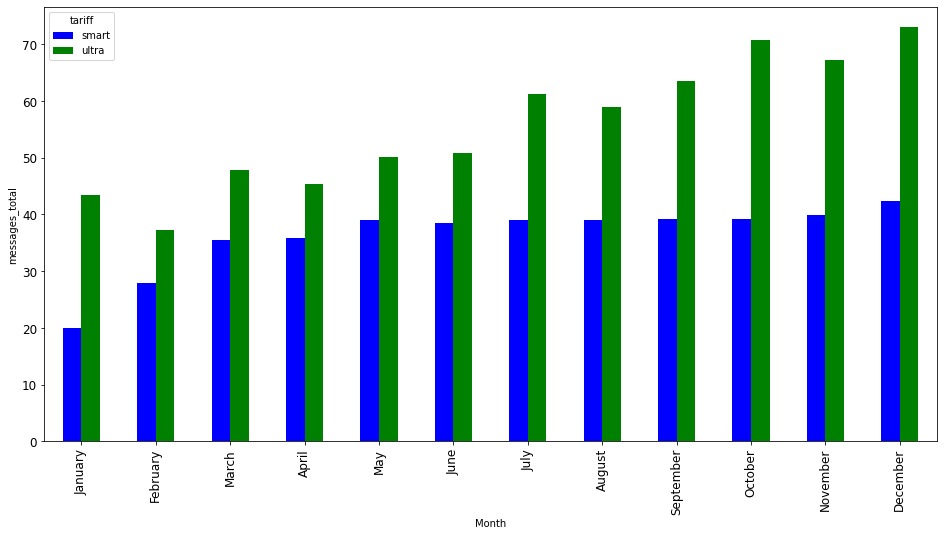

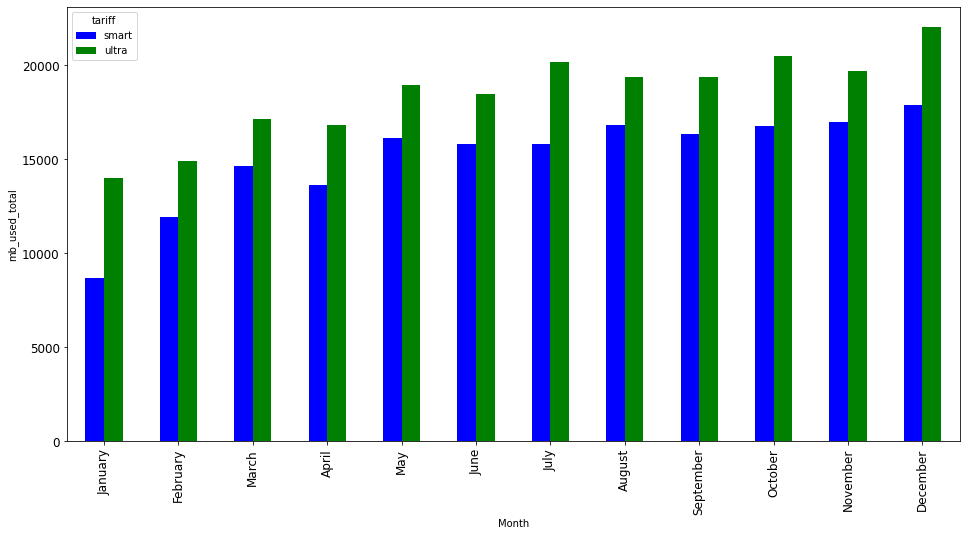

In [313]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

cols = ['duration_total', 'messages_total', 'mb_used_total']

for col in cols:
    (
        data.pivot_table(index='month', columns='tariff', values=col, aggfunc='mean')
            .plot(kind='bar', color=['blue', 'green'], xlabel='Month', ylabel=col, figsize=(16, 8), fontsize=12)
            .set_xticklabels(month_names, rotation=90)
    )

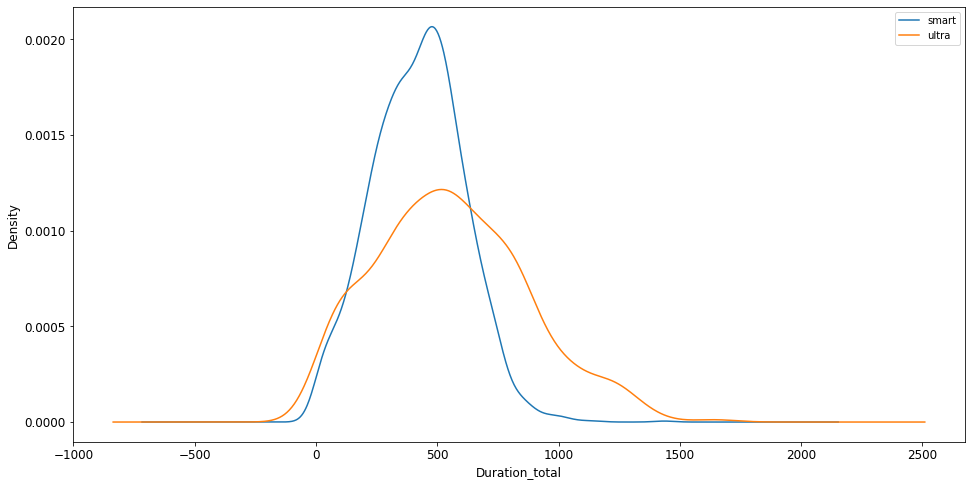

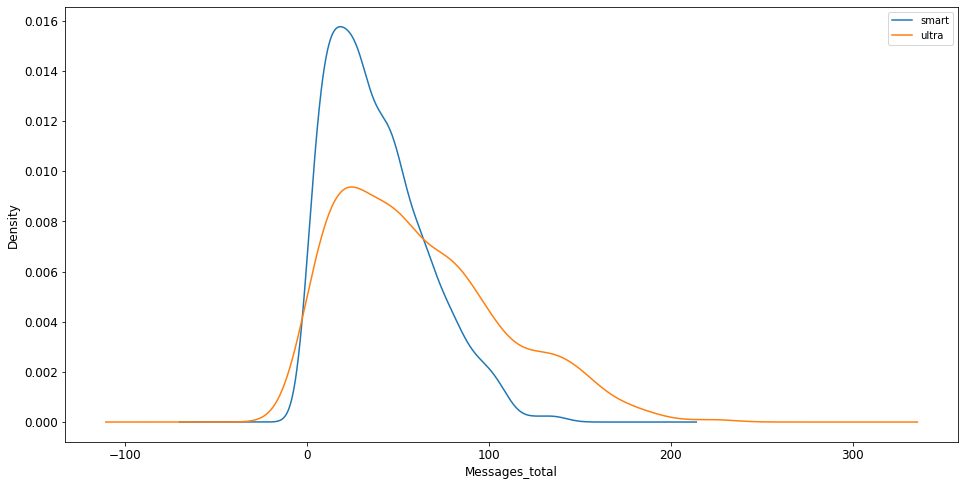

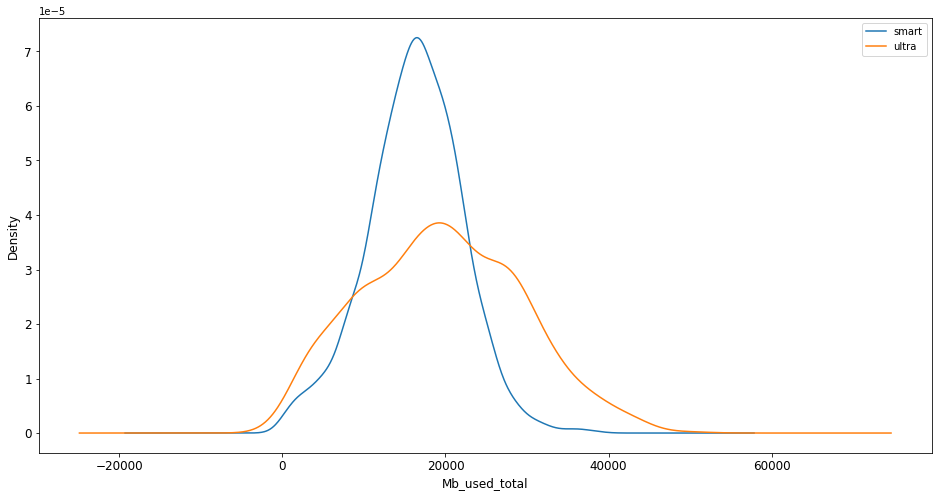

In [269]:
import matplotlib.pyplot as plt

for col in cols:
    data.groupby('tariff')[col].plot(kind='kde', figsize=(16, 8), legend=True, xlabel=col, fontsize=12)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

In [310]:
def var(x):
    return np.var(x, ddof=1)

data_measures = data.pivot_table(
    index='tariff',
    values=['duration_total', 'messages_total', 'mb_used_total'],
    aggfunc=['mean', var, 'std']
)

display(data_measures)

mean                                         var  \
       duration_total mb_used_total messages_total duration_total   
tariff                                                              
smart      421.034987  16245.242517      38.767102   35236.097521   
ultra      556.857713  19596.348524      61.640957   97258.412484   

                                               std                \
       mb_used_total messages_total duration_total mb_used_total   
tariff                                                             
smart   3.355895e+07     718.803619     187.712806    5793.00911   
ultra   9.272805e+07    2008.550011     311.862810    9629.54056   

                       
       messages_total  
tariff                 
smart       26.810513  
ultra       44.816850

In [311]:
data_measures.columns = [
    'duration_mean',
    'mb_used_mean',
    'messages_mean',
    'duration_var',
    'mb_used_var',
    'messages_var',
    'duration_std',
    'mb_used_std',
    'messages_std'
]

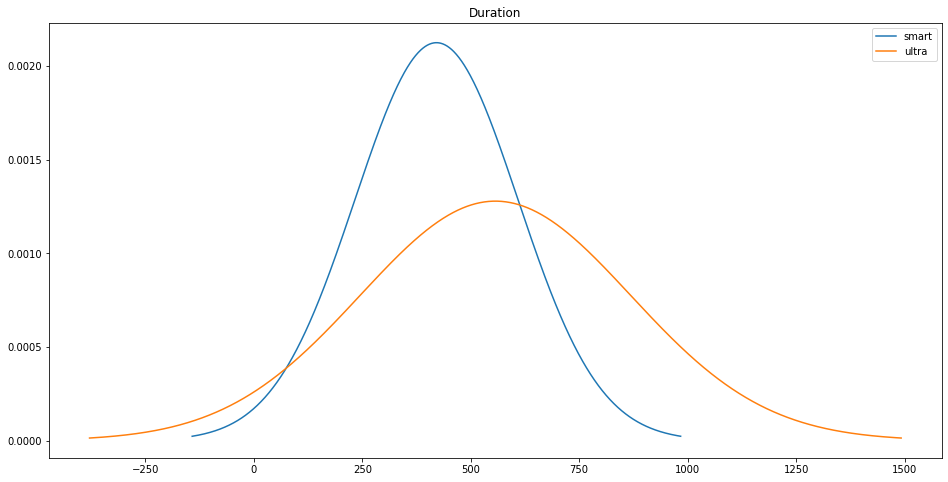

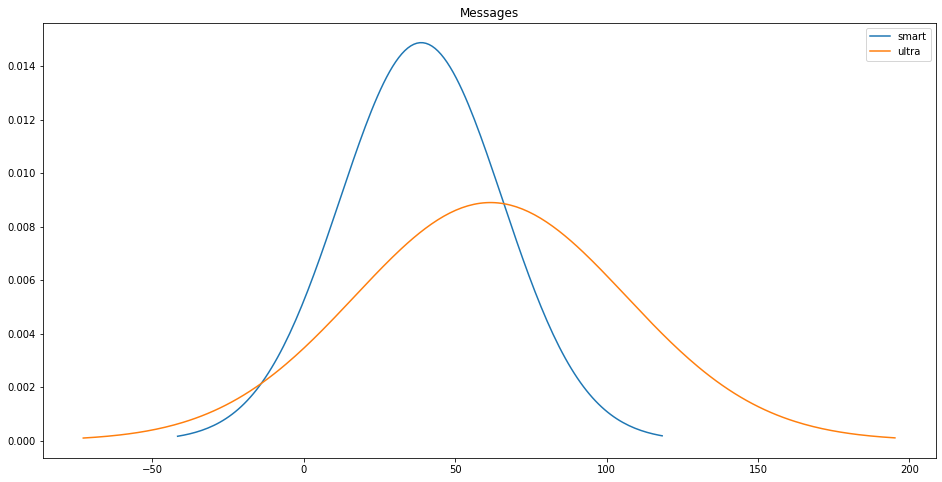

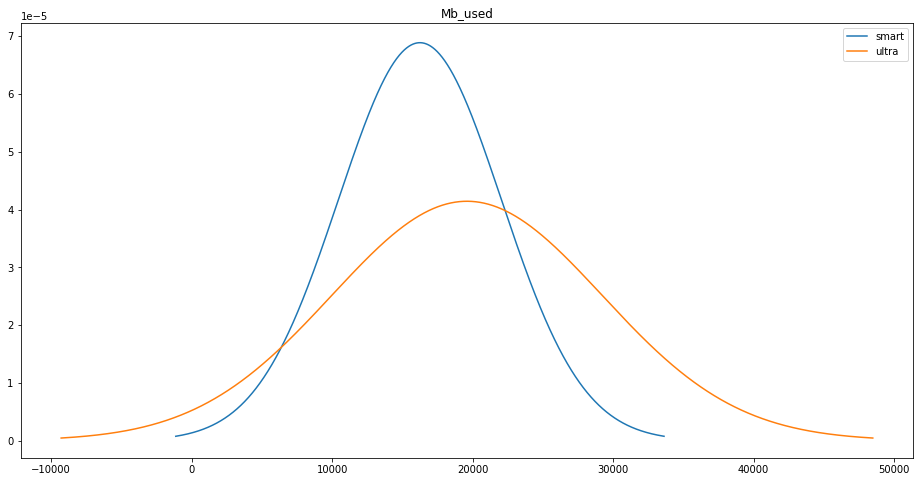

In [307]:
from scipy.stats import norm
from matplotlib.pyplot import figure

for col in ['duration', 'messages', 'mb_used']:
    figure(figsize=(16, 8))
    for row in ['smart', 'ultra']:
        mean = data_measures.loc[row, f'{col}_mean']
        std = data_measures.loc[row, f'{col}_std']
        x_axis = np.arange(mean - 3*std, mean + 3*std, 1)
        plt.plot(x_axis, norm.pdf(x_axis, mean, std), label=row)
    plt.title(col.capitalize())
    plt.legend()
    plt.show()

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для проверки этой гипотезы следует сформулировать нулевую и альтернативную гипотезы:

- **H0** (нулевая гипотеза) - Средние выручки пользователей тарифов ultra и smart **одинаковы**;
- **H1** (альтернативная гипотеза) - Средние выручки пользователей тарифов ultra и smart **различаются**

Так как нам не важен знак различия двух выборок для проверки гипотезы, будем использовать двусторонний t-тест для двух генеральных совокупностей. Выберем уровень значимости 5%.

In [317]:
from scipy import stats as st

alpha = 0.05

ultra_revenue = data[data['tariff'] == 'ultra']['revenue']
smart_revenue = data[data['tariff'] == 'smart']['revenue']

results = st.ttest_ind(ultra_revenue, smart_revenue)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1515961964890638e-119
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу, так как p-value оказалось меньше порогового, а значит средние значения дохода тарифов smart и ultra **различаются**.
Но давайте посчитаем среднее для двух выборок, чтобы оценить знак эффекта.

In [320]:
print('Среднея выручка ultra: ', ultra_revenue.mean())
print('Среднея выручка smart: ', smart_revenue.mean())

Среднея выручка ultra:  2048.936170212766
Среднея выручка smart:  1290.6778067885118


С уверенностью можно сказать, что выручка от пользователей **ultra** больше.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую и альтернативную гипотезы:

- **H0** (нулевая гипотеза) - Средняя выручка пользователей из Москвы и других регионов **одинаковы**;
- **H1** (альтернативная гипотеза) - Средние выручки пользователей из Москвы и других регионов **различаются**


In [326]:
msk_revenue = data[data['city'] == 'Москва']['revenue']
others_revenue = data[data['city'] != 'Москва']['revenue']

results = st.ttest_ind(msk_revenue, others_revenue)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.12167256176036181
Не получилось отвергнуть нулевую гипотезу
